In [27]:
import pandas as pd


df = pd.read_excel('./separated-data/cpu-usage-all.xlsx')
df


,delta-time,service,repetition 1,repetition 2,repetition 3,repetiton 4,avg,max,min,Desviacion Standard,p95,p99
0,0,neo4j-database,0.006111,0.386608,0.419189,0.438848,0.312689,0.438848,0.006111,0.177984,0.435899,0.438258
1,10,neo4j-database,0.024827,0.402727,0.435423,0.438112,0.325272,0.438112,0.024827,0.174020,0.437708,0.438031
2,20,neo4j-database,0.027338,0.402727,0.435423,0.438112,0.325900,0.438112,0.027338,0.172937,0.437708,0.438031
3,30,neo4j-database,0.125266,0.402727,0.435423,0.438112,0.350382,0.438112,0.125266,0.130715,0.437708,0.438031
4,40,neo4j-database,0.125266,0.386199,0.418628,0.448350,0.344611,0.448350,0.125266,0.128532,0.443892,0.447458
...,...,...,...,...,...,...,...,...,...,...,...,...
149,170,open-telemetry-tempo,0.001723,0.002193,0.002560,0.000816,0.001823,0.002560,0.000816,0.000653,0.002505,0.002549
150,180,open-telemetry-tempo,0.000874,0.001924,0.002487,0.001272,0.001639,0.002487,0.000874,0.000617,0.002403,0.002470
151,190,open-telemetry-tempo,0.001530,0.001986,0.002340,0.001272,0.001782,0.002340,0.001272,0.000411,0.002287,0.002329
152,200,open-telemetry-tempo,0.001530,0.001909,0.002235,0.001504,0.001794,0.002235,0.001504,0.000301,0.002186,0.002225


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List



def process(services: List[str], title: str, df: pd.DataFrame):
    fig, ax = plt.subplots(figsize=(12, 7))
    for service in services:
        # Filter the DataFrame for the current service
        service_df = df[df["service"] == service]

        # CRUCIAL: Sort the data by time to draw a continuous line and range
        sorted_df = service_df.sort_values(by="delta-time")

        # Get the data from your columns
        x = sorted_df["delta-time"]
        mean = sorted_df["avg"]
        std = sorted_df["Desviacion Standard"]  # Use your column name here

        # Plot the mean line from the 'avg' column
        ax.plot(x, mean, marker="", linestyle="-", label=f"{service} Mean")

        # Plot the standard deviation from your 'Desviacion Standard' column
        ax.fill_between(x, mean - std, mean + std, alpha=0.2, label=f"{service} Std Dev")

    filtered_df = df[df['service'].isin(services)]
    sns.regplot(
        data=filtered_df,
        x="delta-time",
        y="avg",
        order=2,
        ci=99,  # Set the confidence interval to 99%
        scatter_kws={"alpha": 0.5, "s": 30},  # Customize scatter points
        line_kws={"color": "red", "linewidth": 2},
    )  # Customize regression lineVj
    # --- Finalize the plot ---
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Delta Time (seconds)", fontsize=12)
    ax.set_ylabel("Average Value", fontsize=12)
    # Consolidate the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())

    ax.grid(True, linestyle="--", alpha=0.6)
    plt.show()



In [29]:
sample_service_keys = ["sample-service", "sample-service-tempo"]
backend_service_keys = ['tempo', 'neo4j-database', 'custom-collector']
collectors_service_keys = ['open-telemetry','open-telemetry-tempo']

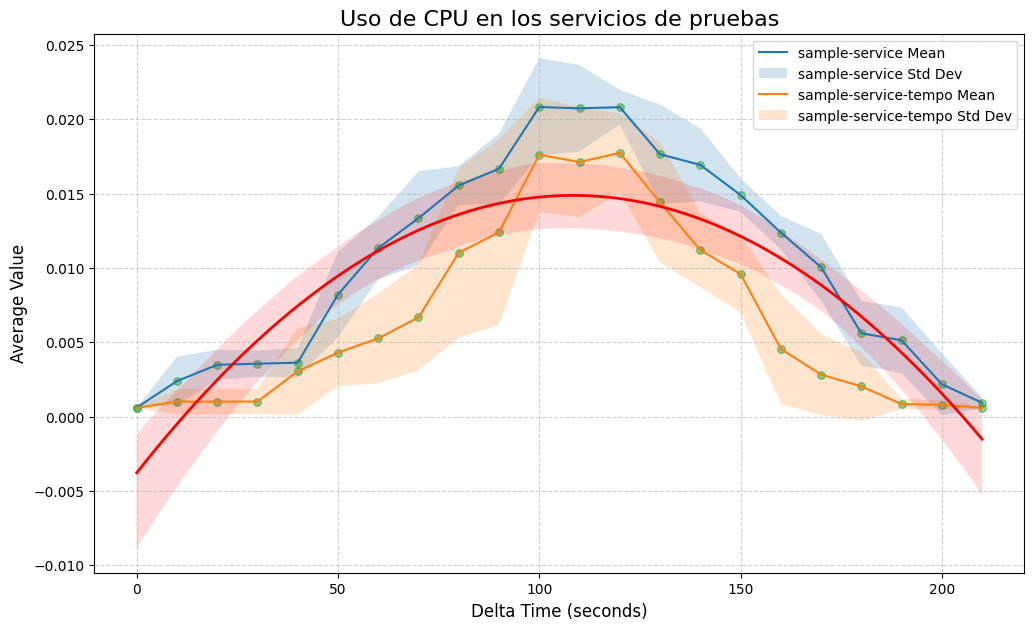

In [30]:
# Get a list of the unique services
process(sample_service_keys, "Uso de CPU en los servicios de pruebas", df)

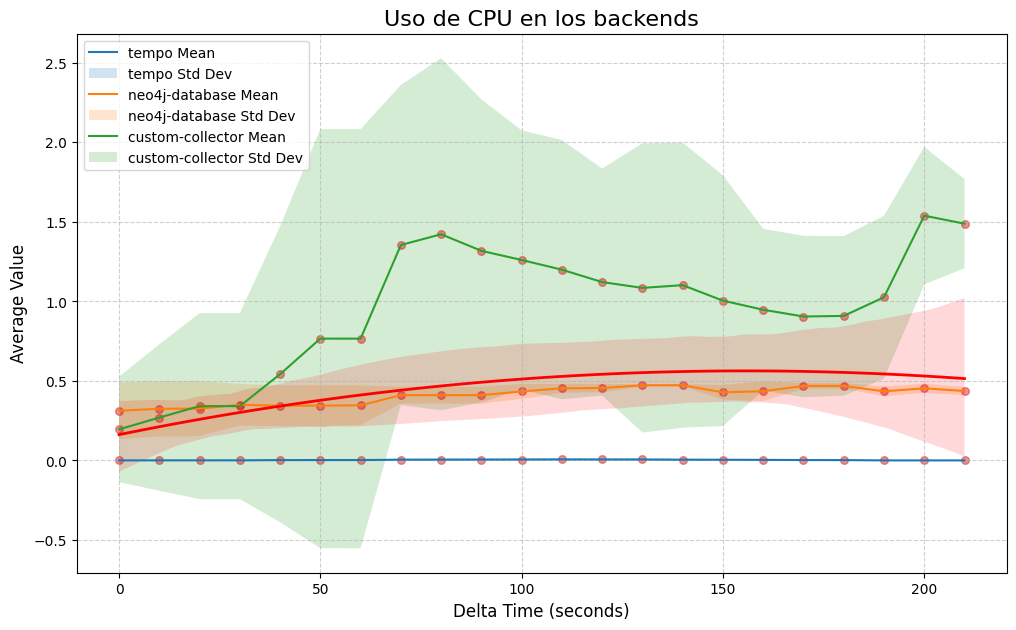

In [31]:
process(backend_service_keys, 'Uso de CPU en los backends', df)

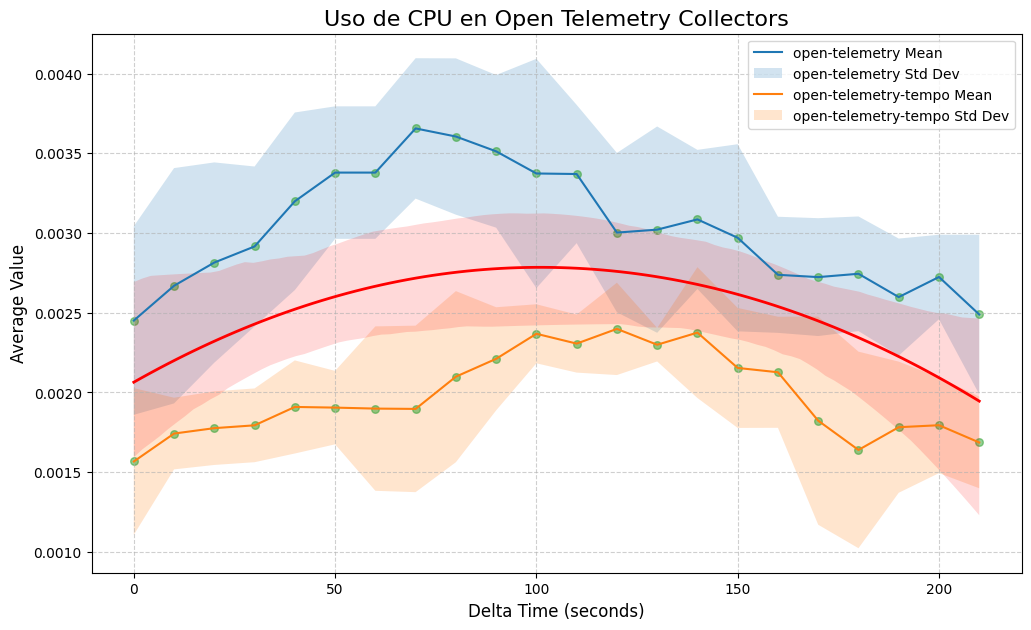

In [32]:
process(collectors_service_keys, 'Uso de CPU en Open Telemetry Collectors', df)

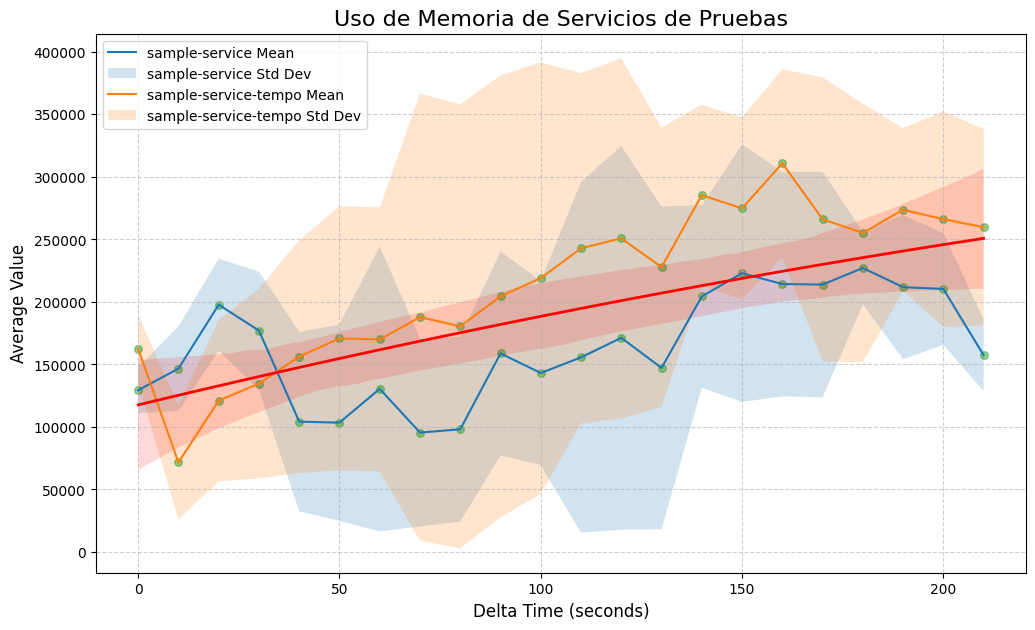

In [33]:
df = pd.read_excel('./separated-data/memory-usage.xlsx')
process(sample_service_keys, 'Uso de Memoria de Servicios de Pruebas', df)

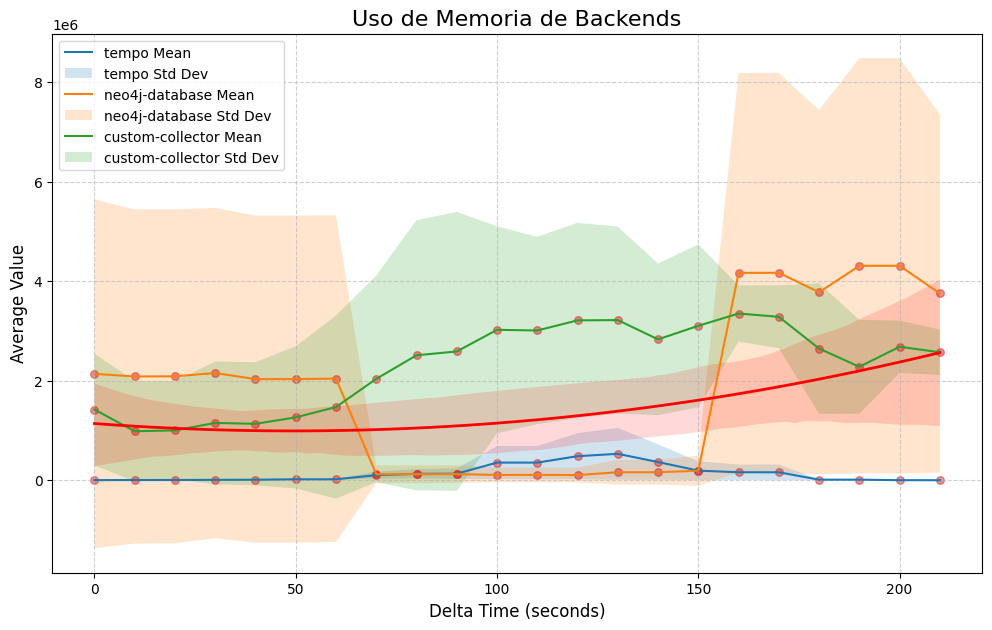

In [34]:
process(backend_service_keys, 'Uso de Memoria de Backends', df)

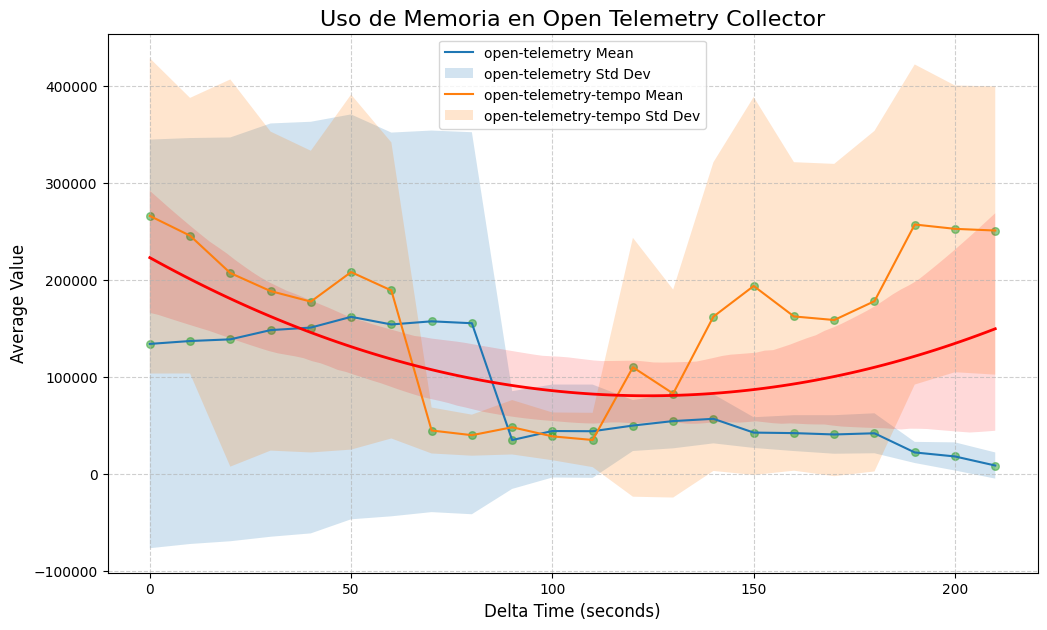

In [35]:
process(collectors_service_keys, 'Uso de Memoria en Open Telemetry Collector',  df)